# Digital Letter Classification

## <u>Data Preprocessing</u>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Import data:**

Source of data: http://archive.ics.uci.edu/ml/datasets/Letter+Recognition

In [2]:
letters = pd.read_csv("letter-recognition.data",
                      sep = ',', header = None)

In [3]:
print(letters.shape)
letters.head()

(20000, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


**Retrieve and apply names of columns:**

In [4]:
names = open("letter-recognition.names", 'r')
names_all = names.readlines()
names.close()

#names of columns exist on the following range
names_all = names_all[37:54]

#retrieve the column names and descriptions
column_names = []
column_names_desc = []

for i in range(len(names_all)):
    names_all[i] = names_all[i].strip('\n')
    line_split = names_all[i].split('\t')
    column_names.append(line_split[2])
    column_names_desc.append(line_split[3])
    
letters.columns = column_names

**The dataframe after applying the correct columns:**

In [5]:
letters

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


**No missing data to resolve and the columns have appropriate data types associated with them:**

In [6]:
letters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


Standardization/normalization of numeric variables is not necessary because:
**each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15** (per the .names file). The summary table below exhibits this:

In [7]:
letters.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


**Split data into indepedent and dependent variables**

In [8]:
letters_target = letters['lettr']
letters_target.head()

0    T
1    I
2    D
3    N
4    G
Name: lettr, dtype: object

In [9]:
letters_matrix = letters.iloc[:, 1:]
letters_matrix.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


**Split the data further (80/20) into training and test sets via "train_test_split" module of "sklearn.model_selection":**

In [10]:
from sklearn.model_selection import train_test_split

letters_train, letters_test, letters_target_train, letters_target_test = train_test_split(
    letters_matrix, letters_target, test_size = 0.2, random_state = 45)

## <u>K-Nearest Neighbors</u>

In [11]:
from sklearn import neighbors

n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(letters_train, letters_target_train)

KNeighborsClassifier(weights='distance')

**Predict function is called on the test observations to produce the predicted classes:**

In [12]:
knnpreds_test = knnclf.predict(letters_test)
knnpreds_test

array(['E', 'O', 'O', ..., 'W', 'A', 'C'], dtype=object)

### K-NN Classifier Evaluation

In [13]:
from sklearn.metrics import classification_report
print(classification_report(letters_target_test, knnpreds_test))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       171
           B       0.92      0.96      0.94       150
           C       0.98      0.96      0.97       133
           D       0.93      0.97      0.95       154
           E       0.94      0.96      0.95       151
           F       0.94      0.94      0.94       162
           G       0.95      0.98      0.97       142
           H       0.92      0.89      0.91       140
           I       0.96      0.98      0.97       156
           J       0.97      0.95      0.96       156
           K       0.92      0.93      0.93       153
           L       1.00      0.98      0.99       165
           M       0.98      0.95      0.97       152
           N       0.97      0.95      0.96       167
           O       0.91      0.97      0.93       148
           P       0.98      0.92      0.95       157
           Q       0.99      0.95      0.97       172
           R       0.92    

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(letters_target_test, knnpreds_test)

0.96025

**Confusion Matrix:**

In [15]:
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(letters_target_test, knnpreds_test)
print(knncm)

[[170   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 144   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   3
    0   0   0   1   0   0   0   0]
 [  0   0 128   0   0   0   1   0   0   0   0   0   0   0   3   0   0   0
    0   0   0   0   1   0   0   0]
 [  0   1   0 149   0   0   0   2   0   0   0   0   0   0   1   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   1   1   0 145   0   1   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   1   0   1]
 [  0   0   0   0   0 152   0   0   0   0   0   0   0   2   0   1   0   0
    1   5   0   1   0   0   0   0]
 [  0   0   0   0   2   0 139   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0   0]
 [  0   1   0   3   1   0   3 125   0   0   1   0   1   1   1   0   0   3
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 153   3   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

**Confusion matrix via matplotlib:**

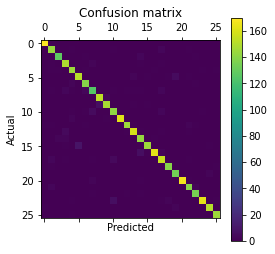

In [16]:
import pylab as plt

plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**The confusion matrix above would be more useful if the distribution of letters (class labels, generally) was balanced. The classficiation report above featuring the various accuracy metrics is adequate.**

In [17]:
letters['lettr'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: lettr, dtype: int64

### K-value Optimization

**Run a loop to find a k-value that maximizes model accuracy:**

In [18]:
from sklearn.metrics import accuracy_score
from sklearn import neighbors

acc = []
num_list = []

from sklearn import metrics
for i in range(5,51):
    if i % 5 != 0:
        pass
    else:
        num_list.append(i)
        knnclf_loop = neighbors.KNeighborsClassifier(n_neighbors = i).fit(letters_train, letters_target_train)
        knnpreds_test_loop = knnclf_loop.predict(letters_test)
        acc.append(accuracy_score(letters_target_test, knnpreds_test_loop))

Maximum accuracy:  0.955 at K = 5


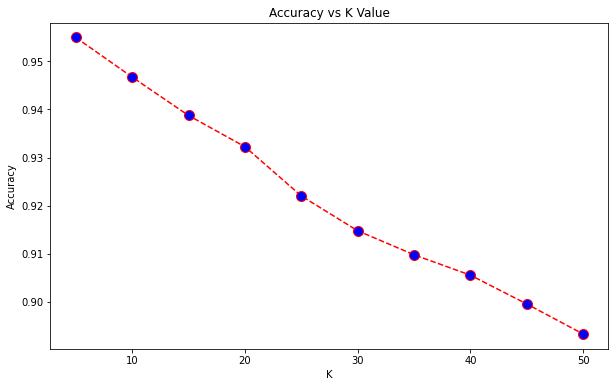

In [19]:
plt.figure(figsize = (10, 6))
plt.plot(num_list, acc, color = 'red', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print('Maximum accuracy: ', max(acc), 'at K =', 2 * acc.index(max(acc)) + 5)

**Model accuracy decreases as the number of neighbors increases which is expected given the 26 class labels (or letters) that are possible for each observation.**

## <u>Decision Tree</u>

In [20]:
from sklearn import tree

treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100, 
                                      min_samples_split = 200, max_depth = 20)
#entropy is chosen as the node criterion because Gini impurity struggles with large numbers of classes

In [21]:
treeclf.fit(letters_train, letters_target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=100,
                       min_samples_split=200)

**Predict function is called on the test observations to produce the predicted classes:**

In [22]:
treepreds_test = treeclf.predict(letters_test)
treepreds_test

array(['E', 'B', 'O', ..., 'W', 'A', 'C'], dtype=object)

### Decision Tree Classifier Evaluation

In [23]:
from sklearn.metrics import classification_report
print(classification_report(letters_target_test, treepreds_test))

              precision    recall  f1-score   support

           A       0.72      0.82      0.77       171
           B       0.52      0.71      0.60       150
           C       0.66      0.59      0.62       133
           D       0.60      0.65      0.62       154
           E       0.55      0.70      0.62       151
           F       0.48      0.69      0.57       162
           G       0.60      0.51      0.55       142
           H       0.62      0.41      0.50       140
           I       0.84      0.69      0.76       156
           J       0.79      0.71      0.75       156
           K       0.54      0.63      0.58       153
           L       0.71      0.79      0.74       165
           M       0.98      0.68      0.80       152
           N       0.69      0.82      0.75       167
           O       0.47      0.64      0.54       148
           P       0.70      0.67      0.68       157
           Q       0.73      0.57      0.64       172
           R       0.52    

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(letters_target_test, treepreds_test)

0.6575

In [25]:
from sklearn.metrics import confusion_matrix
treecm = confusion_matrix(letters_target_test, treepreds_test)
print(treecm)

[[140   0   0   0   0   0   0   0   0   2   3   1   0   9   0   0   6   2
    4   0   0   0   0   1   3   0]
 [  0 106   0   6   3   6   8   0   0   2   3   1   0   0   1   0   0   8
    1   0   0   0   1   0   0   4]
 [  5   0  79   0   6   8   7   4   0   0   5   3   0   0  14   2   0   0
    0   0   0   0   0   0   0   0]
 [  4  10   0 100   2   1   0   1   0   4   1   4   0   2  12   2   0   7
    2   0   0   0   0   1   1   0]
 [  0   0   8   0 105   4   5   0   2   0   1   4   0   0   0   0   3   5
    9   0   0   0   0   5   0   0]
 [  0   7   0   5   0 112   0   0   0   0   0   1   0   0   1  10   1   1
    6   2   0   1   0   0  10   5]
 [  3   3  11   0   0   3  72  11   0   2   5   0   0   0   5   0  14  11
    2   0   0   0   0   0   0   0]
 [  2   6   1   8   6   5   1  58   0   0  11   0   0   7  13   0   0  17
    0   0   1   1   0   0   3   0]
 [  0   9   0   5   1   6   0   0 108   5   0   0   0   0   0   1   0   9
    8   0   0   0   0   1   1   2]
 [  3   8   0   1  

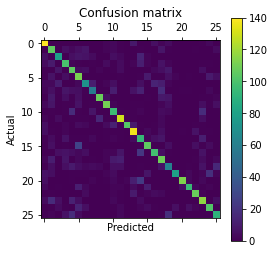

In [26]:
import pylab as plt

plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Decision Tree Visualization

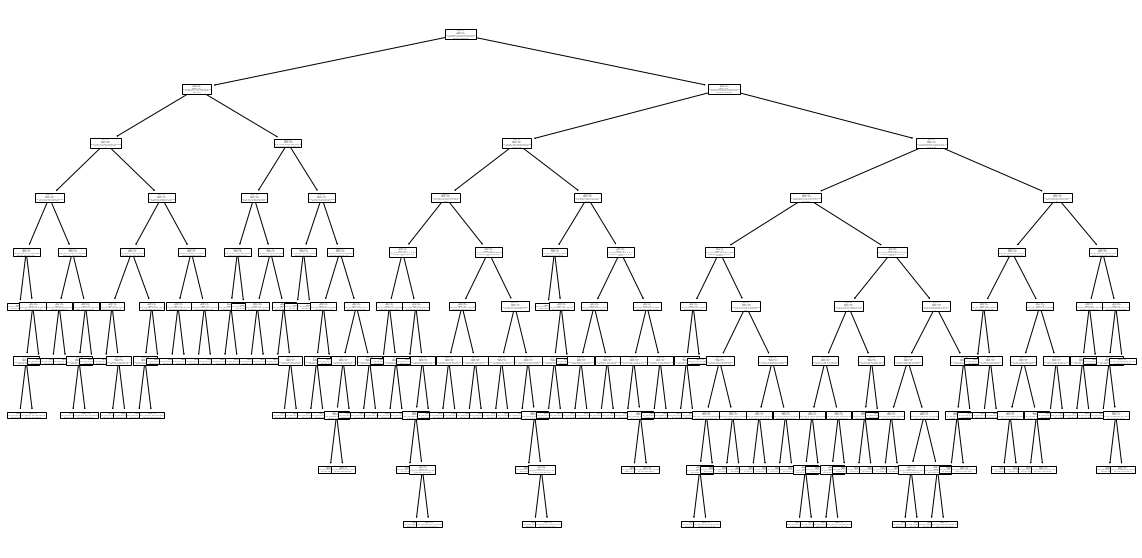

In [27]:
from sklearn import tree

plt.figure(figsize = (20, 10))
tree.plot_tree(treeclf.fit(letters_train, letters_target_train))
plt.savefig('tree_high_dpi', dpi = 100)
plt.show()

As expected, there are a lot of branches and leaves based on the default parameters set for tree. Below, I zoom in on the top of the tree to identify the key attributes that reveal the most information in this dataset. 

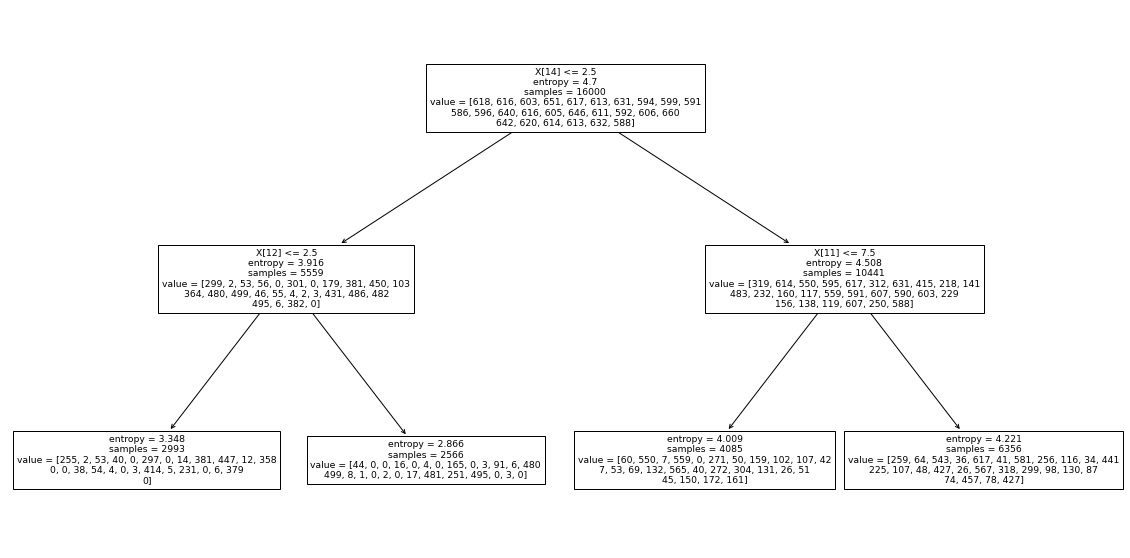

In [28]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100, 
                                      min_samples_split = 200, max_depth = 2)

plt.figure(figsize = (20, 10))
tree.plot_tree(treeclf.fit(letters_train, letters_target_train))
plt.show()

**Definition of relevant attributes:**

X[14] = xegvy (mean edge count left to right)  <br>
X[12] = xy2br (mean of x * y * y)  <br>
x[11] = x2ybr (mean of x * x * y)

### Leaf-Node Threshold Optimization

**Run a loop to confirm that small leaf-node thresholds lead to more accurate but over-fitting decision trees**

In [29]:
from sklearn.metrics import accuracy_score
from sklearn import neighbors

tree_acc = []
tree_node_list = [100, 90, 70, 50, 25, 15, 5, 3, 2]

from sklearn import metrics

for i in range(len(tree_node_list)):
    treeclf_loop = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf = tree_node_list[i], 
                                      min_samples_split = tree_node_list[i] * 2, max_depth = 20).fit(
        letters_train, letters_target_train)
    treepreds_test_loop = treeclf_loop.predict(letters_test)
    tree_acc.append(accuracy_score(letters_target_test, treepreds_test_loop))

Maximum accuracy:  0.87 with a leaf-node threshold of 2


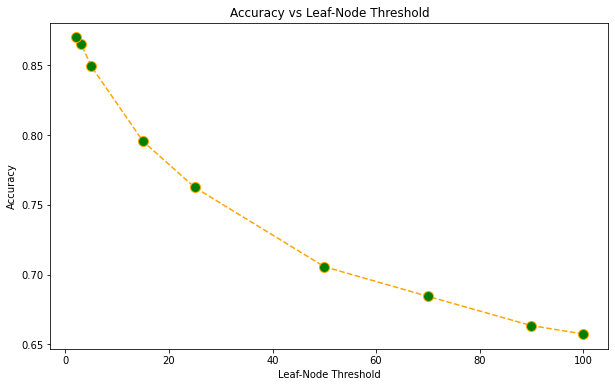

In [30]:
plt.figure(figsize = (10, 6))
plt.plot(tree_node_list, tree_acc, color = 'orange', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'green', markersize = 10)
plt.title('Accuracy vs Leaf-Node Threshold')
plt.xlabel('Leaf-Node Threshold')
plt.ylabel('Accuracy')

print('Maximum accuracy: ', max(tree_acc), 'with a leaf-node threshold of', 
      tree_node_list[tree_acc.index(max(tree_acc))])

## <u>Cross-validation Results</u>

### K-Nearest Neighbors (CV)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.model_selection  import cross_val_score

knn_cv_acc = []
knn_cv_k_list = []

from sklearn import metrics
for i in range(5,51):
    if i % 5 != 0:
        pass
    else:
        knn_cv_k_list.append(i)
        knnclf_cv = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn_cv_avg = cross_val_score(knnclf_cv, letters_matrix, letters_target, cv=10)
        knn_cv_acc.append(knn_cv_avg.mean())

Maximum accuracy:  0.9550500000000002 at K = 5


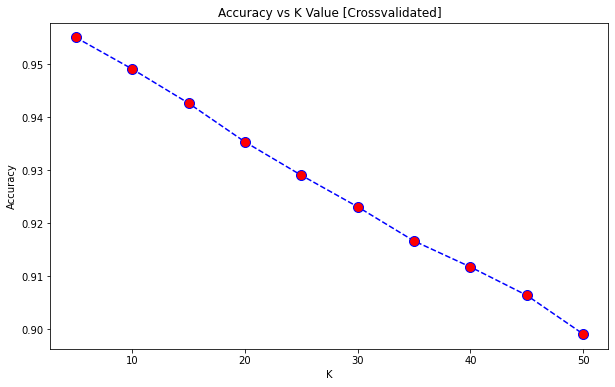

In [32]:
plt.figure(figsize = (10, 6))
plt.plot(knn_cv_k_list, knn_cv_acc, color = 'blue', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Accuracy vs K Value [Crossvalidated]')
plt.xlabel('K')
plt.ylabel('Accuracy')

print('Maximum accuracy: ', max(knn_cv_acc), 'at K =', 2 * knn_cv_acc.index(max(knn_cv_acc)) + 5)

### Decision Tree (CV)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.model_selection  import cross_val_score

tree_cv_acc = []
tree_cv_node_list = [100, 90, 70, 50, 25, 15, 5, 3, 2]

from sklearn import metrics

for i in range(len(tree_cv_node_list)):
    treeclf_cv = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf = tree_cv_node_list[i], 
                                      min_samples_split = tree_cv_node_list[i] * 2, max_depth = 20)
    tree_cv_avg = cross_val_score(treeclf_cv, letters_matrix, letters_target, cv=10)
    tree_cv_acc.append(tree_cv_avg.mean())

Maximum accuracy:  0.8779999999999999 with a leaf-node threshold of 2


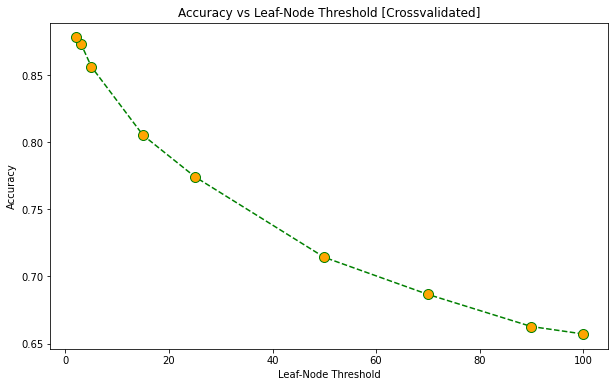

In [34]:
plt.figure(figsize = (10, 6))
plt.plot(tree_cv_node_list, tree_cv_acc, color = 'green', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'orange', markersize = 10)
plt.title('Accuracy vs Leaf-Node Threshold [Crossvalidated]')
plt.xlabel('Leaf-Node Threshold')
plt.ylabel('Accuracy')

print('Maximum accuracy: ', max(tree_cv_acc), 'with a leaf-node threshold of', 
      tree_cv_node_list[tree_cv_acc.index(max(tree_cv_acc))])